In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import datetime
import scipy.stats as stats

#graphing
import matplotlib.pyplot as plt
#stats
import statsmodels.api as sm
from statsmodels.base.model import GenericLikelihoodModel
from sklearn.mixture import GaussianMixture 
#import testing
import sys
sys.path.append("../")
import selection_tests

import itertools

In [2]:
data = pd.read_stata("all_plans_c_bonus.dta")
data['log_enroll'] = np.log(data['enr_c'])
data['enr_total'] = data['enr_c'] + data['enr_FFS']
data = data[data['year'] > 2011]
print(data.columns)

print(data[data['double_bonus']==1]['bmFFS'].mean())
print(data['bmFFS'].mean())
print(data['star_C2'].mean())

Index(['index', 'ssa', 'state', 'county', 'year', 'enr_FFS', 'enr_c',
       'hhi_ins', 'hhi_ins_noSNP', 'ins_parent', 'ins_parent_noSNPs',
       'ins_plans', 'HMO_share', 'PPO_share', 'qual_2012', 'qual_2013',
       'qual_2014', 'qual_2015', 'partaenrollment', 'partb_enrollment',
       'prescription_drugs', 'prev_comp_dental', 'eye_exams', 'hearing_exams',
       'deductible', 'partb_premium', 'plan_premium', 'partd_premium', 'OOPC',
       'risk_pub_p', 'bid_pub_p', 'rebate_pub_p', 'risk_pub_c', 'bid_pub_c',
       'rebate_pub_c', 'star_C2', 'star_CD2', 'bmFFS', 'bm_ns', 'risk_FFS',
       'FFS_AB', 'FFS_AB_rs', 'buydown', 'OOPC_noprem', 'extras', 'quartile',
       'bid_pub_p_nominal', 'bid_pub_c_nominal', 'rebate_pub_p_nominal',
       'rebate_pub_c_nominal', 'bmFFS_nominal', 'FFS_AB_nominal',
       'bm_ns_nominal', 'OOPC_nominal', 'plan_premium_nominal',
       'partd_premium_nominal', 'buydown_nominal', 'rebate_std',
       'benchmark_diff', 'benchmark_diff_n', 'benchmark_dif

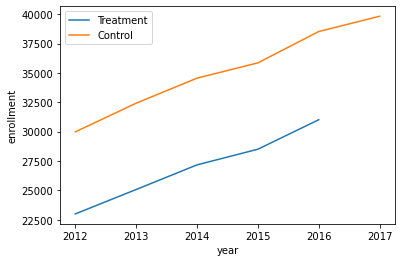

In [4]:
data_treat = data[data['double_bonus']==1][['enr_c','year','enr_total']]
data_treat['y'] = data_treat['enr_c']*data_treat['enr_total']
data_treat_group = data_treat.groupby('year',as_index=False).sum()
data_treat_group['y'] = data_treat_group['y']/data_treat_group['enr_total']

data_control  = data[data['double_bonus']==0][['enr_c','year','enr_total']]
data_control['y'] = data_control['enr_c']*data_control['enr_total']
data_control_group = data_control.groupby('year',as_index=False).sum()
data_control_group['y'] = data_control_group['y']/data_control_group['enr_total']


plt.xlabel('year')
plt.ylabel('enrollment')
plt.plot(data_treat_group['year'],data_treat_group['y'],label='Treatment')
plt.plot(data_control_group['year'],data_control_group['y'],label='Control')
plt.savefig('pre-trends_double_bonus',dpi=300)


plt.legend()
plt.show()